In [ ]:
#bar plot plots x according to the mean of y

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [3]:
df = pd.read_csv(r"K:\Kaggle data sets\data.csv")

In [5]:
df.head(11)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [9]:
plt.style.use("seaborn")

C:\Users\karee\AppData\Local\Temp\ipykernel_19436\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# What is the distribution of employees by department? 

Text(0.5, 1.0, 'Department Distribution')

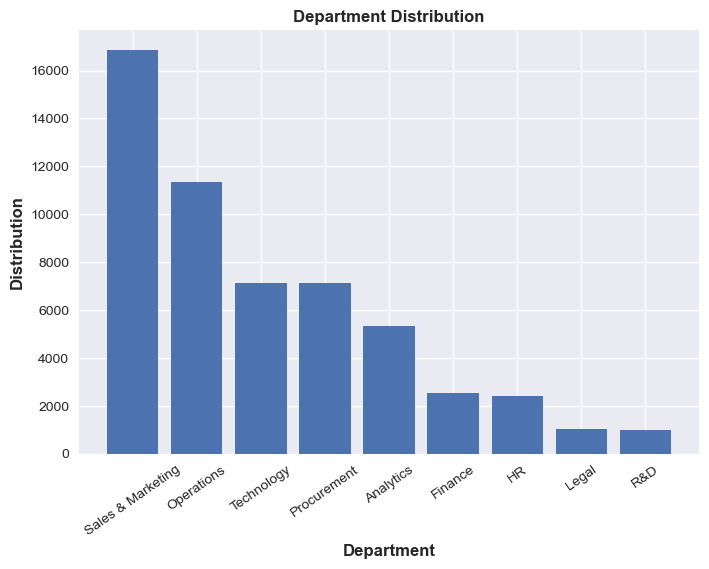

In [80]:
plt.bar(df.department.value_counts().index,df.department.value_counts())
plt.xlabel("Department",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("Department Distribution",fontdict={'size': 12, 'weight': 'bold'})

Text(0.5, 1.0, 'Department Distribution')

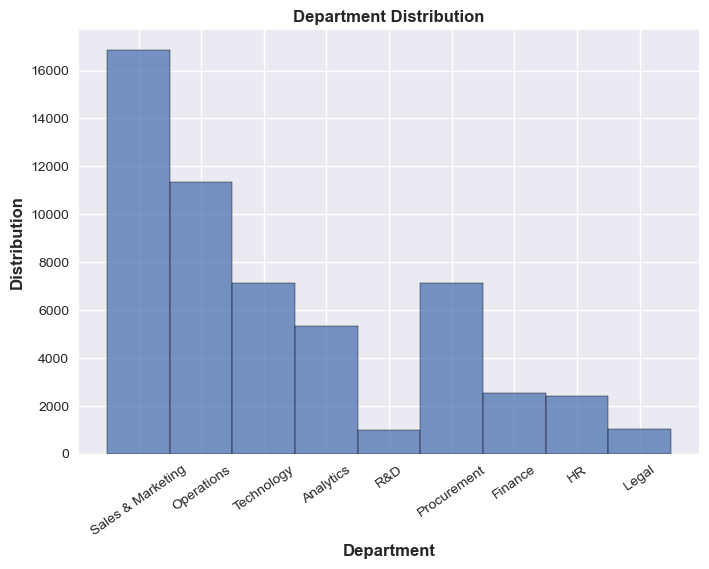

In [30]:
sns.histplot(x= "department",data= df)
plt.xlabel("Department",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("Department Distribution",fontdict={'size': 12, 'weight': 'bold'})

# 2-How does the distribution of promotions vary across different regions?



Text(0.5, 1.0, 'Comparison Between Different Regions Based On Promotion')

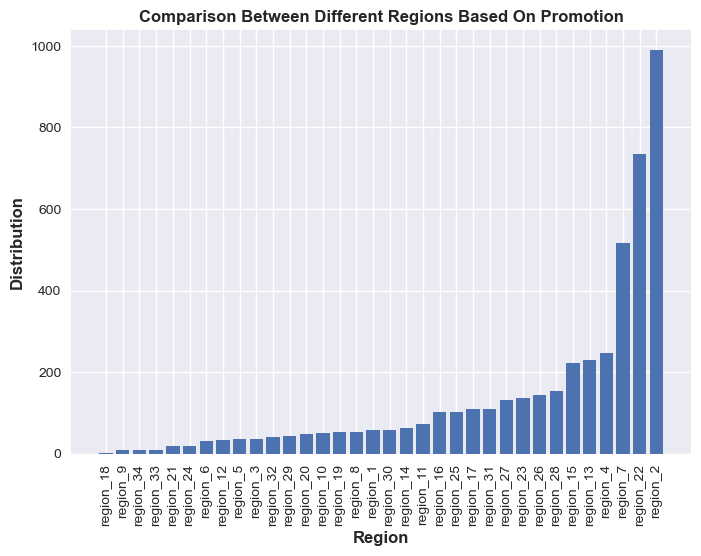

In [86]:
x=df.groupby("region")["is_promoted"].sum().sort_values().index
plt.bar(x,df.groupby("region")["is_promoted"].sum().sort_values())
plt.xlabel("Region",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=90)
plt.title("Comparison Between Different Regions Based On Promotion",fontdict={'size': 12, 'weight': 'bold'})
#sum()>value_counts() cause i can't use an object as an index and at the same time i can't use astype("str") with value_counts()

Text(0.5, 1.0, 'Comparison Between Different Regions Based On Promotion')

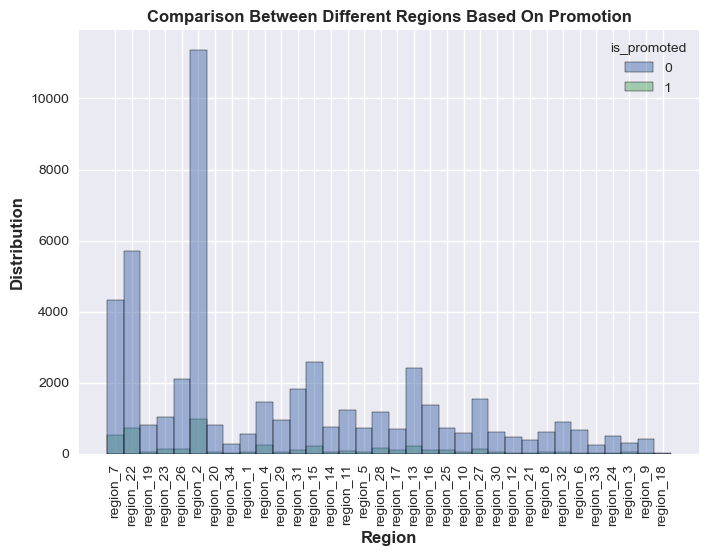

In [10]:
sns.histplot(x="region", hue="is_promoted",data=df)
plt.xlabel("Region",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=90)
plt.title("Comparison Between Different Regions Based On Promotion",fontdict={'size': 12, 'weight': 'bold'})

# 3-Is there a difference in the average training scores between promoted and non-promoted employees?



Text(0.5, 1.0, 'The difference in Avg Training Score Between Promoted And Not Promoted Employees')

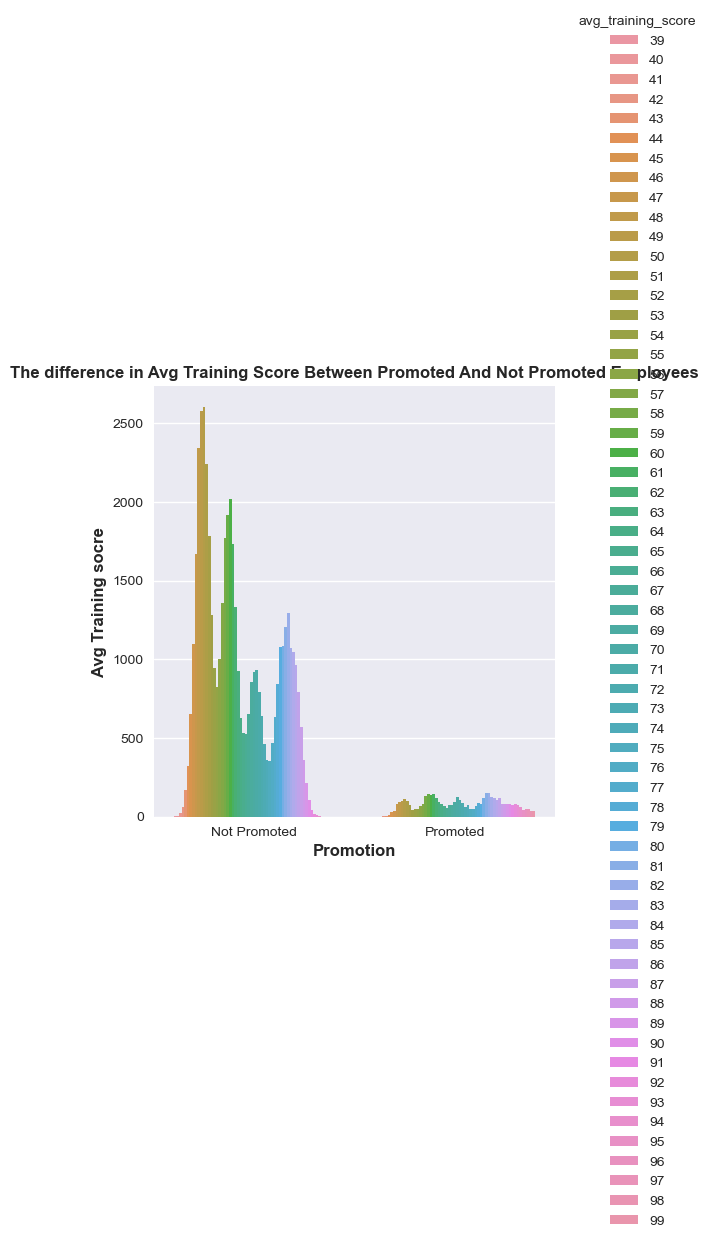

In [164]:
sns.catplot(x="is_promoted" , kind="count" ,data =df ,hue ="avg_training_score")
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])
plt.ylabel("Avg Training socre",fontdict={'size': 12, 'weight': 'bold'})
plt.xlabel("Promotion",fontdict={'size': 12, 'weight': 'bold'})
plt.title("The difference in Avg Training Score Between Promoted And Not Promoted Employees",fontdict={'size': 12, 'weight': 'bold'})

In [258]:
df.groupby("is_promoted")["avg_training_score"].mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

Text(0.5, 1.0, 'The difference in Avg Training Score Between Promoted And Not Promoted Employees')

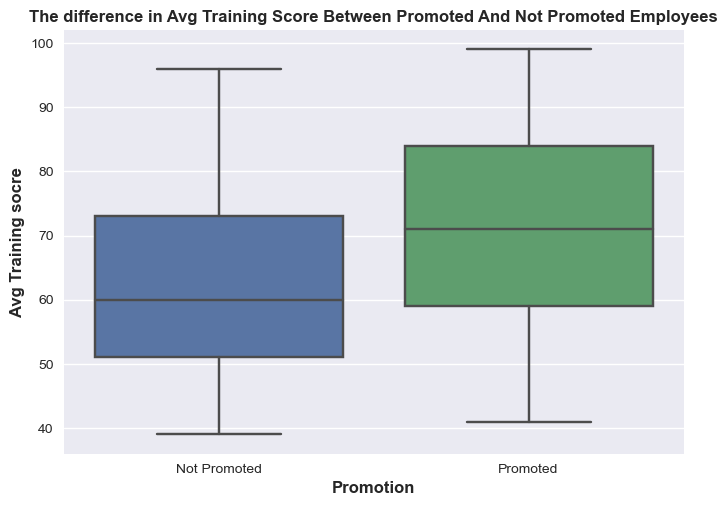

In [118]:
sns.boxplot(x='is_promoted', y='avg_training_score', data=df )
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])
plt.ylabel("Avg Training socre",fontdict={'size': 12, 'weight': 'bold'})
plt.xlabel("Promotion",fontdict={'size': 12, 'weight': 'bold'})
plt.title("The difference in Avg Training Score Between Promoted And Not Promoted Employees",fontdict={'size': 12, 'weight': 'bold'})

# 4-How does the distribution of ages differ for promoted and non-promoted employees?



<BarContainer object of 41 artists>

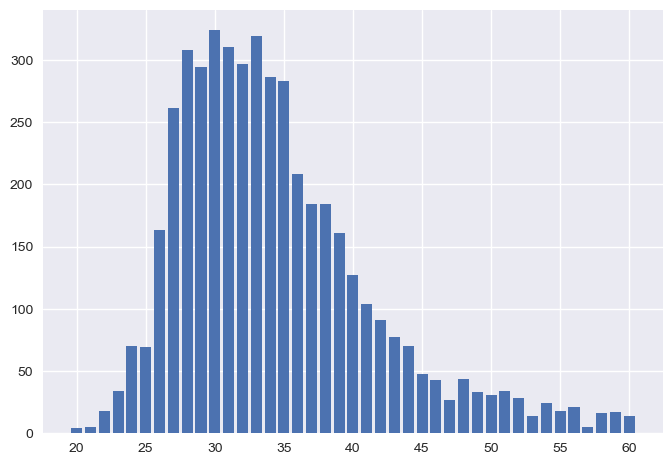

In [138]:
plt.bar(df.groupby("age")["is_promoted"].sum().index ,df.groupby("age")["is_promoted"].sum() )

<Axes: xlabel='age', ylabel='Count'>

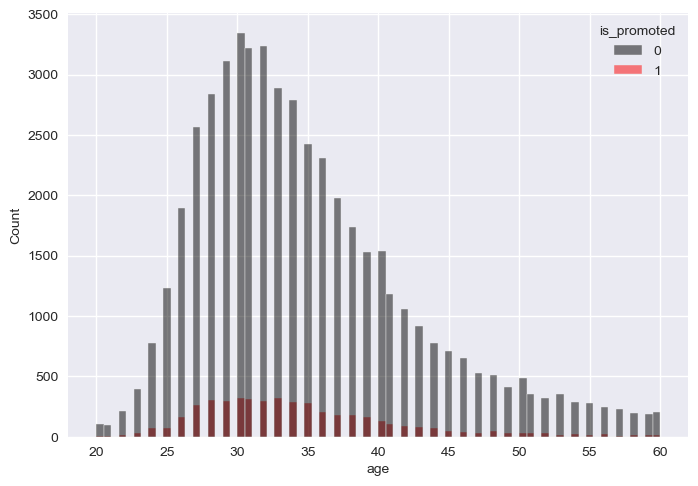

In [158]:
sns.histplot(x="age", hue="is_promoted",data=df,palette={1:"r"})

# 5-What is the relationship between the length of service and the likelihood of getting promoted?



In [187]:
df.groupby('length_of_service')['is_promoted'].mean().reset_index()


,length_of_service,is_promoted
0,1,0.082912
1,2,0.089019
2,3,0.086592
3,4,0.087478
4,5,0.081447
5,6,0.084706
6,7,0.083589
7,8,0.093306
8,9,0.087105
9,10,0.093023


Text(0.5, 1.0, 'Relationship between Length of Service and Promotion Rate')

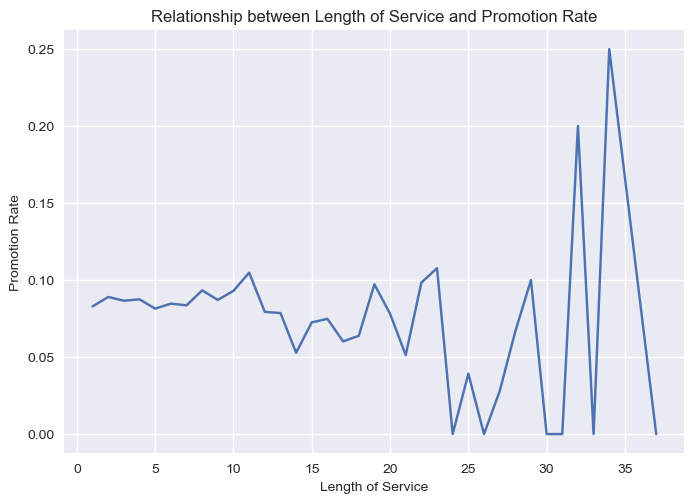

In [189]:
# Calculate average promotion rate for each length of service
avg_promotion_rate = df.groupby('length_of_service')['is_promoted'].mean().reset_index()

# Create the line plot
sns.lineplot(x='length_of_service', y='is_promoted', data=avg_promotion_rate)

# Customize the plot
plt.xlabel('Length of Service')
plt.ylabel('Promotion Rate')
plt.title('Relationship between Length of Service and Promotion Rate')

# 6-Are employees with higher KPIs (>80%) more likely to get promoted?

### Yes, as the employees who have a KPI>80% have a rate of .17 to only .04 in case of the employees who have KPI<80%

In [253]:
#df.groupby('KPIs_met >80%')['is_promoted'].value_counts()
#df['KPIs_met >80%'].value_counts()

In [251]:
KPIs_rate=df.groupby('KPIs_met >80%')["is_promoted"].mean().reset_index()
KPIs_rate

,KPIs_met >80%,is_promoted
0,0,0.039587
1,1,0.169094


<Axes: xlabel='KPIs_met >80%', ylabel='is_promoted'>

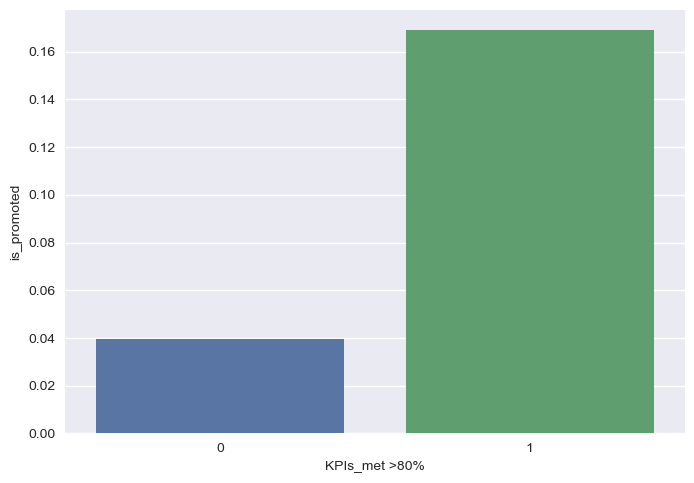

In [252]:
sns.barplot(x='KPIs_met >80%' ,y='is_promoted' ,data =KPIs_rate)

# 7-Is there a significant difference in the average training scores for employees who received awards?



In [255]:
df.groupby("awards_won?")["avg_training_score"].mean()

awards_won?
0    63.238186
1    69.649606
Name: avg_training_score, dtype: float64

<Axes: xlabel='awards_won?', ylabel='avg_training_score'>

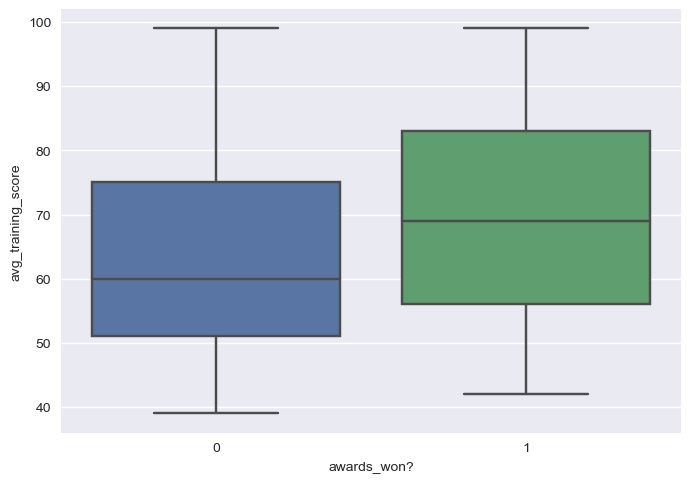

In [256]:
sns.boxplot(x="awards_won?" , y="avg_training_score" , data =df)

# 8-How does the distribution of previous year ratings vary between promoted and non-promoted employees?



<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

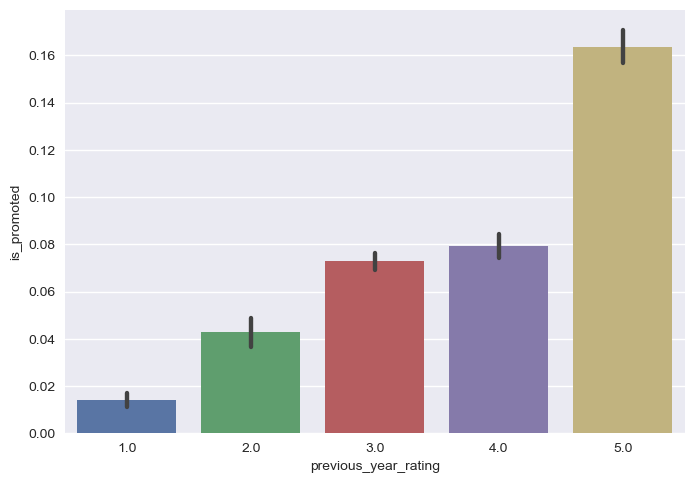

In [268]:
#sns.barplot(x="previous_year_rating", y= "is_promoted",data =df)
#this is wrong because it calculates the mean of each year and we want the sum

<BarContainer object of 5 artists>

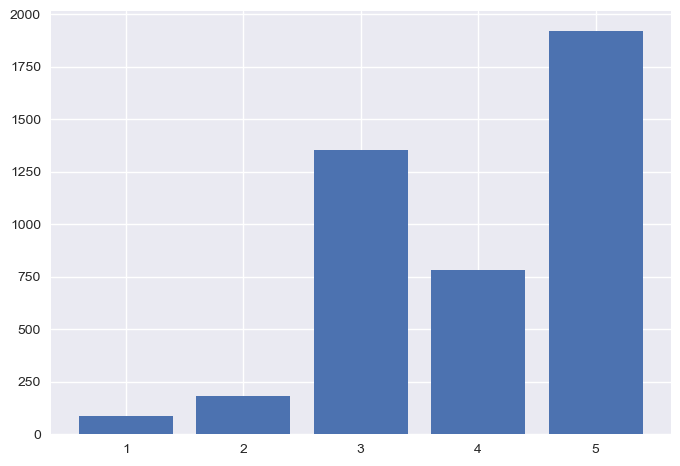

In [33]:
plt.bar(df.groupby("previous_year_rating")["is_promoted"].mean().index,df.groupby("previous_year_rating")["is_promoted"].sum())

<Axes: xlabel='previous_year_rating', ylabel='Count'>

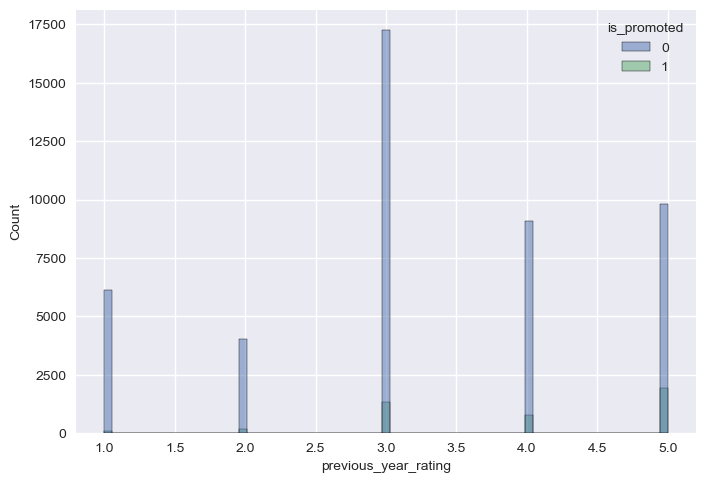

In [35]:
sns.histplot(x= "previous_year_rating" , hue= "is_promoted",data =df )


# 9-What is the distribution of the number of trainings taken by employees?


In [34]:
df.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

<Axes: xlabel='no_of_trainings', ylabel='Count'>

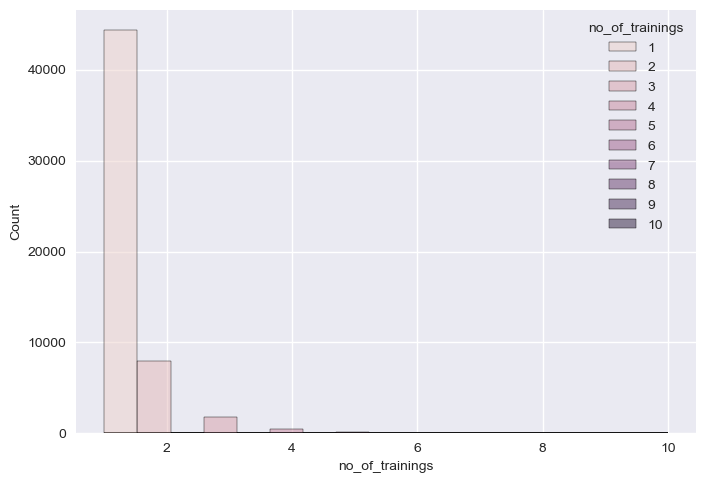

In [32]:
sns.histplot(x="no_of_trainings", hue="no_of_trainings" ,data=df)

In [36]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0



# 10-How is the gender distribution within different departments?


Text(0.5, 1.0, 'Department Distribution')

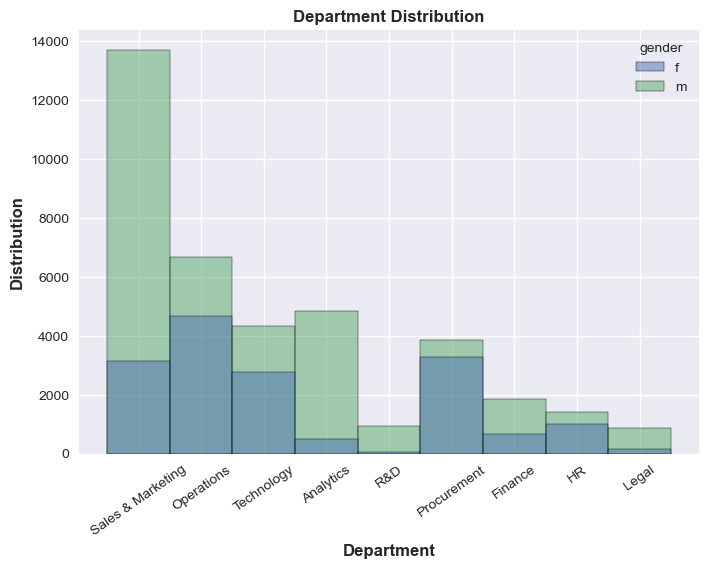

In [43]:
sns.histplot(x="department",hue="gender",data= df)
plt.xlabel("Department",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("Department Distribution",fontdict={'size': 12, 'weight': 'bold'})

# 11-What is the most common recruitment channel used by employees in different departments?



In [50]:
df.groupby("department")["recruitment_channel"].value_counts()

department         recruitment_channel
Analytics          other                  2973
                   sourcing               2296
                   referred                 83
Finance            other                  1463
                   sourcing               1068
                   referred                  5
HR                 other                  1380
                   sourcing                935
                   referred                103
Legal              other                   590
                   sourcing                435
                   referred                 14
Operations         other                  6279
                   sourcing               4831
                   referred                238
Procurement        other                  4002
                   sourcing               3057
                   referred                 79
R&D                other                   555
                   sourcing                425
                   re

Text(0.5, 1.0, 'Department Distribution')

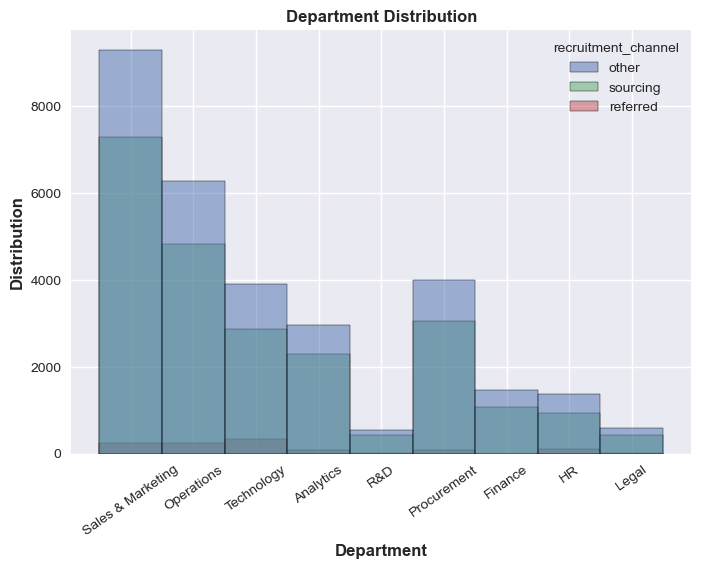

In [54]:
sns.histplot(x="department",hue="recruitment_channel",data= df,hue_order=["other","sourcing","referred"])
plt.xlabel("Department",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("Department Distribution",fontdict={'size': 12, 'weight': 'bold'})

# 12-Are there any patterns between education level and the likelihood of promotion?



In [69]:
a=df.groupby("education")["is_promoted"].mean().reset_index()

<Axes: xlabel='education', ylabel='is_promoted'>

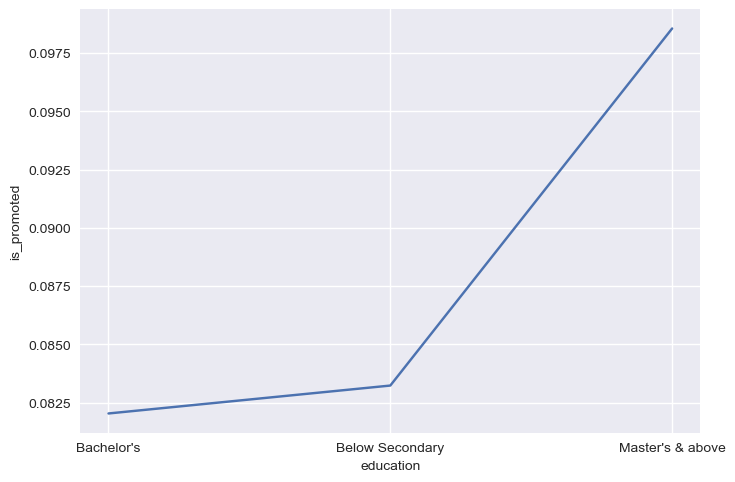

In [70]:
sns.lineplot(x="education",y="is_promoted" ,data=a)


<Axes: xlabel='education', ylabel='is_promoted'>

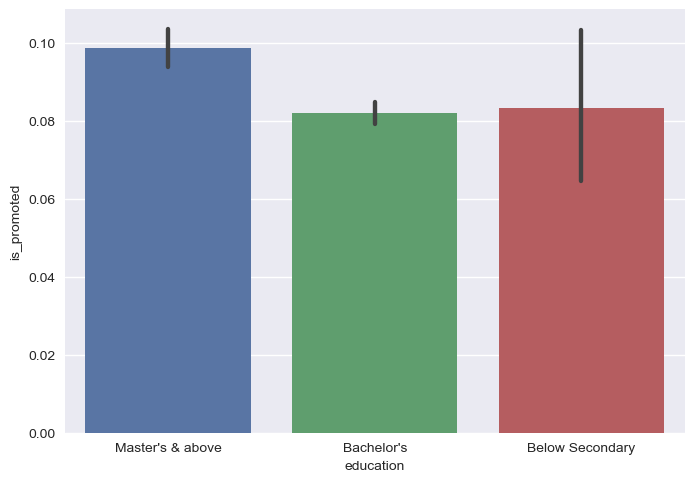

In [68]:
sns.barplot(x="education", y="is_promoted", data=df)


# 13-How does the age distribution vary between different recruitment channels?



<Axes: xlabel='age', ylabel='Count'>

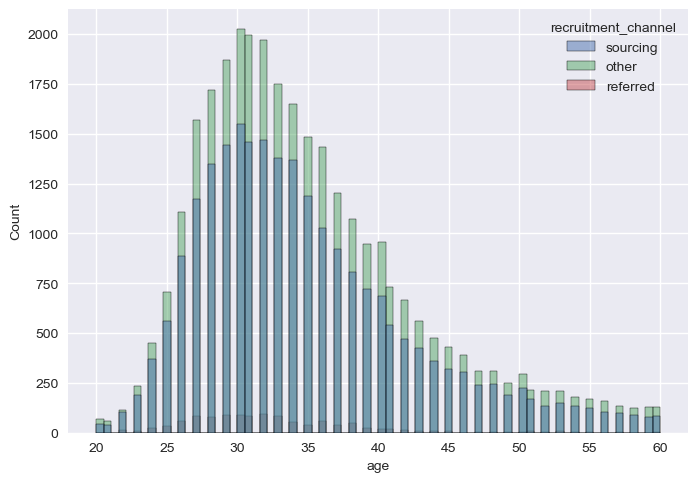

In [79]:
sns.histplot(x= "age",data=df,hue="recruitment_channel")

# 14-What is the average age of employees in different departments?



In [90]:
a=df.groupby("department")["age"].mean().reset_index()

Text(0.5, 1.0, 'Average Age Of Employees In different Departments')

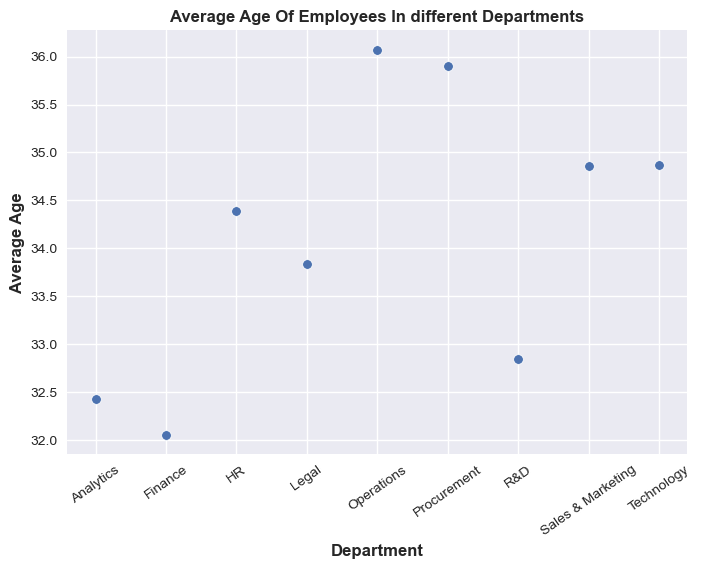

In [93]:
sns.scatterplot(x="department",y="age",data=a)
plt.xlabel("Department",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Average Age",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("Average Age Of Employees In different Departments",fontdict={'size': 12, 'weight': 'bold'})

# **15-What is the correlation between average training scores and previous year ratings?



<Axes: xlabel='avg_training_score', ylabel='previous_year_rating'>

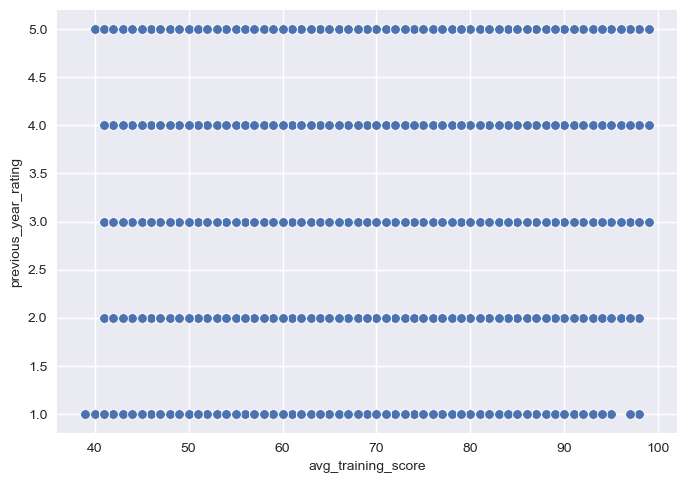

In [97]:
sns.scatterplot(x="avg_training_score",y="previous_year_rating",data=df)

# 16-Are there any outliers in the length of service?

### Yes, There are


In [102]:
df.length_of_service.value_counts().sort_values()

37       1
34       4
33       9
32      10
30      12
31      20
29      30
28      30
27      36
26      41
25      51
22      61
23      65
24      70
21      78
20     128
19     329
18     392
17     432
16     548
14     549
15     593
13     687
12     794
11     916
10    2193
9     2629
8     2883
1     4547
6     4734
7     5551
5     5832
2     6684
4     6836
3     7033
Name: length_of_service, dtype: int64

<Axes: xlabel='length_of_service'>

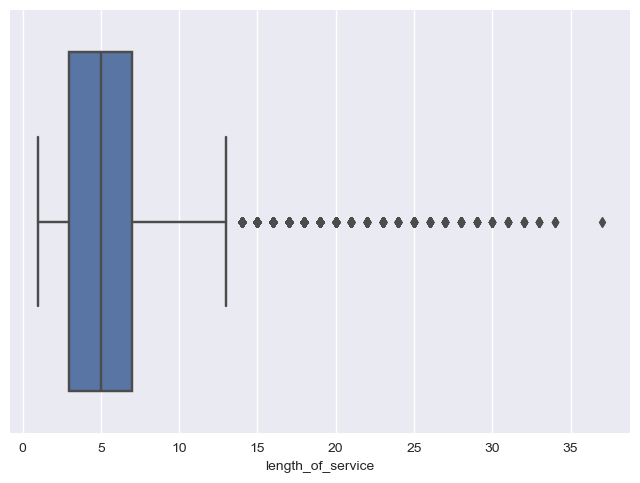

In [100]:
sns.boxplot(x="length_of_service",data =df )

# **17-How does the distribution of promotions change based on the number of trainings taken?



<Axes: xlabel='no_of_trainings', ylabel='Count'>

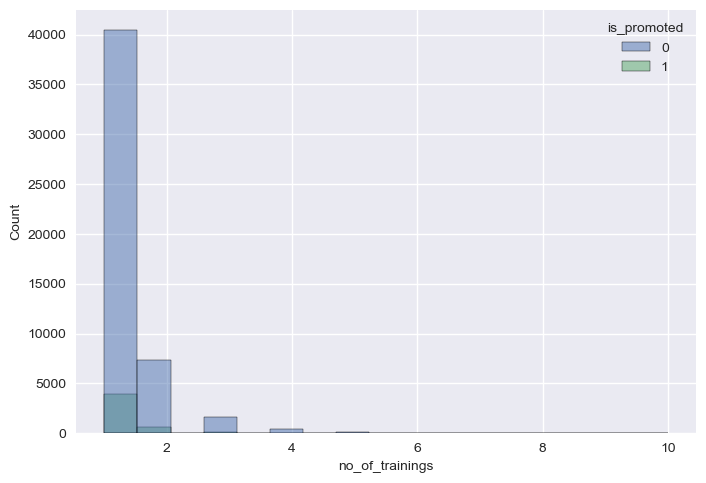

In [108]:
sns.histplot(hue="is_promoted",x="no_of_trainings",data=df)


In [106]:
df.groupby("no_of_trainings")["is_promoted"].mean()

no_of_trainings
1     0.088107
2     0.075748
3     0.068694
4     0.055556
5     0.023438
6     0.045455
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: is_promoted, dtype: float64

# 18-Is there a difference in promotions for male and female employees?



Text(0.5, 1.0, 'the distribution of promotion for each gender')

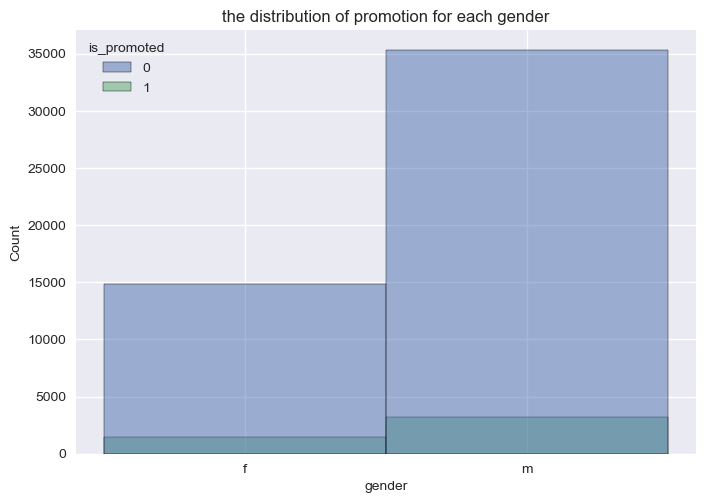

In [120]:
sns.histplot(hue="is_promoted",x="gender",data = df)
plt.title("the distribution of promotion for each gender")

Text(0.5, 1.0, 'the percentage of promotion for each gender')

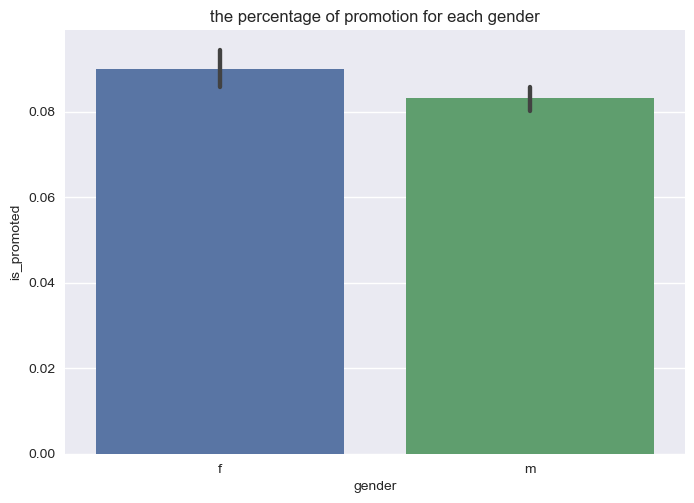

In [119]:
sns.barplot(x="gender",y="is_promoted",data =df)
plt.title("the percentage of promotion for each gender")

In [116]:
df.groupby("gender")["is_promoted"].mean()

gender
f    0.089934
m    0.083151
Name: is_promoted, dtype: float64

# 19-What is the proportion of promoted employees in each department?



Text(0.5, 1.0, 'promoted employees in each department')

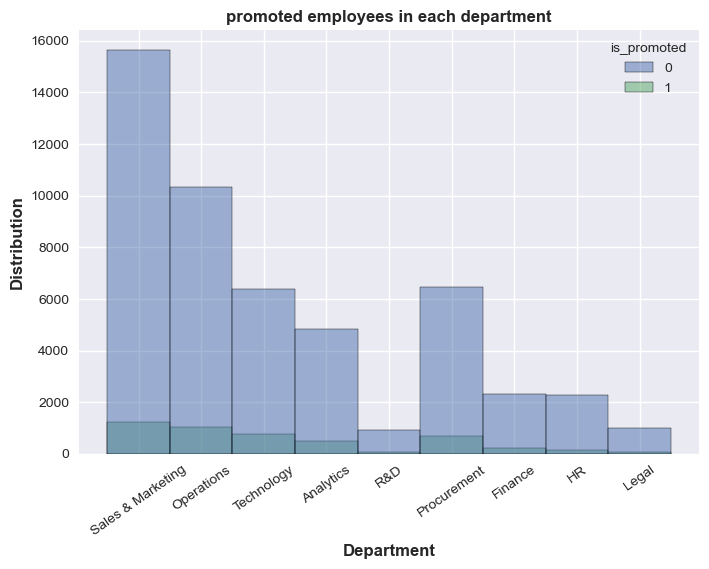

In [127]:
sns.histplot(x="department",hue="is_promoted",data= df)
plt.xlabel("Department",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("promoted employees in each department",fontdict={'size': 12, 'weight': 'bold'})

Text(0.5, 1.0, 'promoted employees in each department')

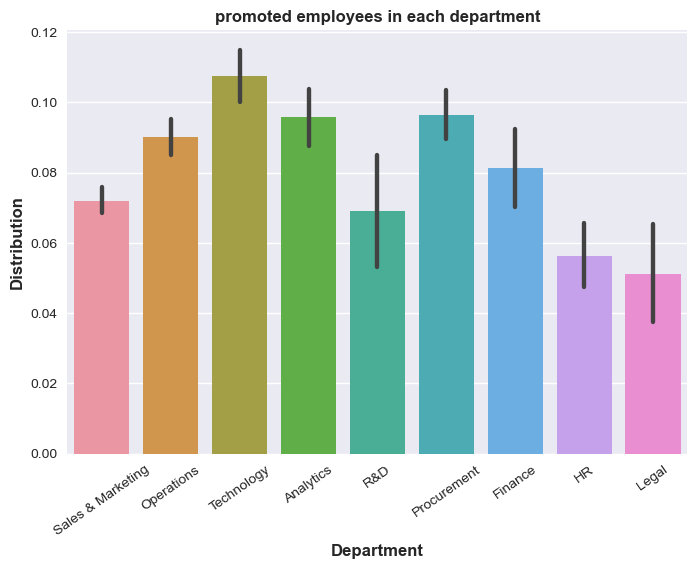

In [126]:
sns.barplot(x="department",y="is_promoted",data= df)
plt.xlabel("Department",fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel("Distribution",fontdict={'size': 12, 'weight': 'bold'})
plt.xticks(rotation=35)
plt.title("promoted employees in each department",fontdict={'size': 12, 'weight': 'bold'})

# 20-How does the distribution of promotions change based on the age groups of employees?

In [ ]:
# Define the age groups
#age_groups = ['18-25', '26-35', '36-45', '46-55', '56 and above']

Text(0.5, 0, 'age Groups')

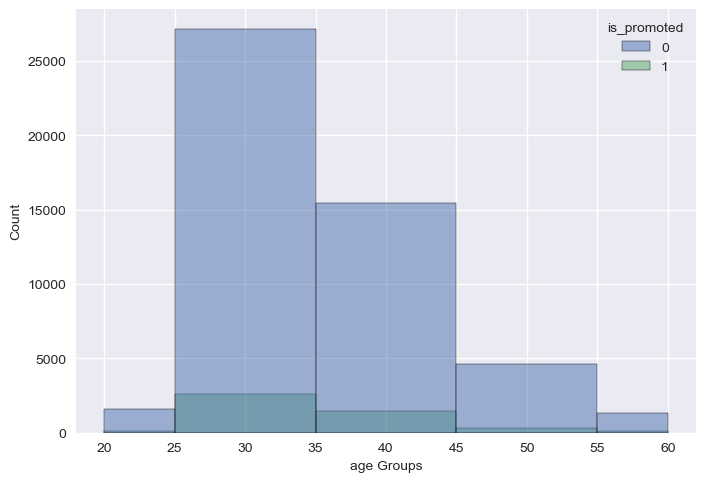

In [143]:

sns.histplot(x="age" ,hue="is_promoted",data= df,bins=[df.age.min(), 25, 35, 45, 55, df.age.max()])
plt.xlabel("age Groups")